In [1]:
import mne 

raw = mne.io.read_raw_gdf(r"C:\Users\Malak\Documents\Semester 8\HCI\BCICIV_2a_gdf\A01T.gdf", eog=['EOG-left', 'EOG-central', 'EOG-right'])

Extracting EDF parameters from C:\Users\Malak\Documents\Semester 8\HCI\BCICIV_2a_gdf\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...


c:\Users\Malak\anaconda3\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


In [2]:
#drop eog channels
raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

Measurement date,"January 17, 2005 12:00:00 GMT"
Experimenter,Unknown
Participant,A01
Digitized points,Not available
Good channels,22 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.50 Hz
Lowpass,100.00 Hz


In [3]:
events = mne.events_from_annotations(raw)

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']


In [4]:
events

(array([[     0,      0,      5],
        [     0,      0,      3],
        [ 29683,      0,      5],
        ...,
        [670550,      0,      6],
        [670550,      0,      1],
        [671050,      0,      7]]),
 {'1023': 1,
  '1072': 2,
  '276': 3,
  '277': 4,
  '32766': 5,
  '768': 6,
  '769': 7,
  '770': 8,
  '771': 9,
  '772': 10})

In [5]:
events[0][0:20]

array([[     0,      0,      5],
       [     0,      0,      3],
       [ 29683,      0,      5],
       [ 29683,      0,      4],
       [ 49955,      0,      5],
       [ 49955,      0,      2],
       [ 91518,      0,      5],
       [ 91868,      0,      6],
       [ 92368,      0,     10],
       [ 93871,      0,      6],
       [ 94371,      0,      9],
       [ 95789,      0,      6],
       [ 96289,      0,      8],
       [ 97741,      0,      6],
       [ 98241,      0,      7],
       [ 99749,      0,      6],
       [100249,      0,      7],
       [101860,      0,      6],
       [102360,      0,      8],
       [103777,      0,      6]])

From the paper
'1023': 1 (Rejected trial),
'1072': 2 (Eye movements),
'276': 3 (eyes open)),
'277': 4 (eyes closed),
'32766':5 (Start of a new run),
'768': 6 (Start of a trial),
'769': 7 (class 1),
'770': 8 (class 2),
'771': 9 (class 3),
'772': 10 (class 4)

In [6]:
event_dict={
 'reject':1,
 'eye move':2,
 'eye open':3,
 'eye close':4,
 'new run':5,
 'new trial':6,
 'class 1':7,
 'class 2':8,
 'class 3':9,
 'class 4':10,
}

C:\Users\Malak\AppData\Local\Temp\ipykernel_25544\1745170862.py:1: RuntimeWarning: event 8 missing from event_id will be ignored
  fig = mne.viz.plot_events(events[0], event_id=event_dict, sfreq=raw.info['sfreq'],
C:\Users\Malak\AppData\Local\Temp\ipykernel_25544\1745170862.py:1: RuntimeWarning: event 9 missing from event_id will be ignored
  fig = mne.viz.plot_events(events[0], event_id=event_dict, sfreq=raw.info['sfreq'],
C:\Users\Malak\AppData\Local\Temp\ipykernel_25544\1745170862.py:1: RuntimeWarning: event 10 missing from event_id will be ignored
  fig = mne.viz.plot_events(events[0], event_id=event_dict, sfreq=raw.info['sfreq'],


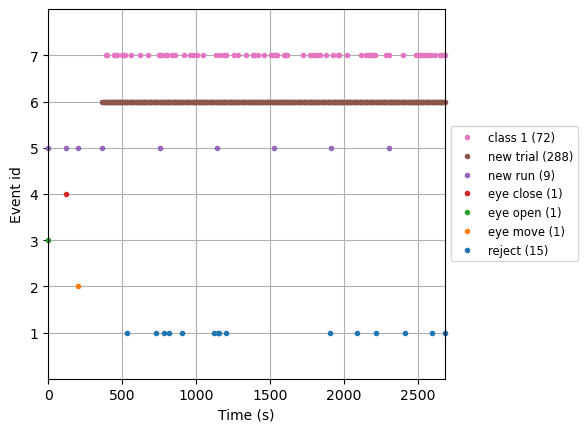

In [7]:
fig = mne.viz.plot_events(events[0], event_id=event_dict, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp)

In [8]:
epoch = mne.Epochs(raw, events[0], event_id=[7,8],tmin= -0.1, tmax=0.7)

Not setting metadata
144 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated


In [9]:
# shape of data
epoch.get_data().shape

Loading data for 144 events and 201 original time points ...
0 bad epochs dropped


(144, 22, 201)

In [10]:
# labels
labels = epoch.events[:, -1]  # take channel only
print(labels) 

[8 7 7 8 8 7 7 7 8 8 7 7 7 8 7 8 8 7 8 7 8 8 8 7 7 7 8 7 7 8 7 7 8 7 8 8 7
 8 7 7 8 7 8 8 8 8 8 7 8 7 7 7 8 8 7 8 7 8 7 8 8 8 7 7 8 7 8 8 7 7 8 7 8 7
 7 8 7 7 7 8 8 8 8 7 8 8 8 7 7 7 7 7 8 7 8 8 7 8 7 7 8 8 8 7 8 8 8 8 8 7 8
 8 7 7 7 7 7 7 8 7 7 8 8 7 8 8 8 8 8 7 7 7 7 8 8 7 7 7 8 8 7 7 8 7]


In [11]:
evoked_1 = epoch['7'].average()
evoked_2 = epoch['8'].average()

# print(evoked_2)

combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


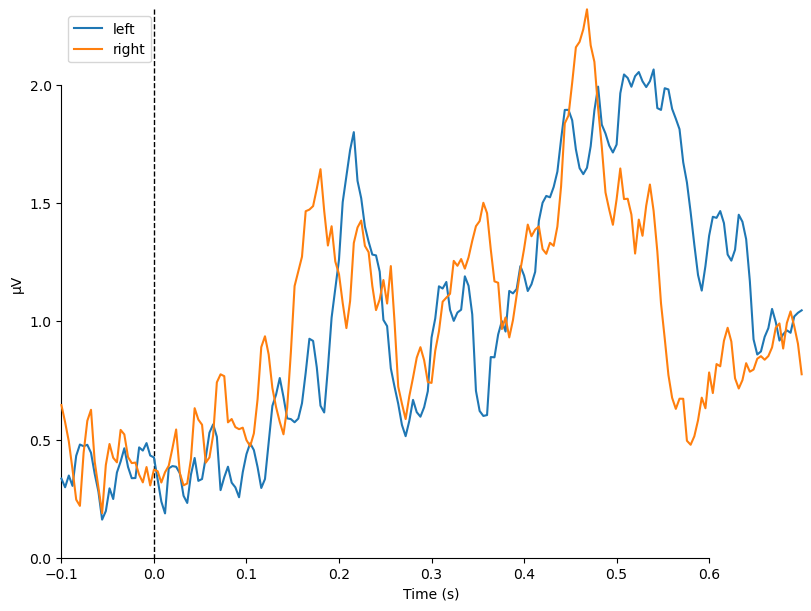

[<Figure size 800x600 with 1 Axes>]

In [12]:
#left,right
dicts={'left': evoked_1, 'right': evoked_2}
mne.viz.plot_compare_evokeds(dicts)

In [13]:
def read_data(path):
  raw=mne.io.read_raw_gdf(path,preload=True,
                          eog=['EOG-left', 'EOG-central', 'EOG-right'])
  raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])
  raw.set_eeg_reference()  ##
  events=mne.events_from_annotations(raw)
  epochs = mne.Epochs(raw, events[0], event_id=[7,8],tmin= -0.1, tmax=0.7,on_missing ='warn')
  labels=epochs.events[:,-1]
  features=epochs.get_data()
  return features,labels


In [21]:
features,labels = read_data(r"C:\Users\Malak\Documents\Semester 8\HCI\BCICIV_2a_gdf\A09E.gdf")

Extracting EDF parameters from C:\Users\Malak\Documents\Semester 8\HCI\BCICIV_2a_gdf\A09E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 675097  =      0.000 ...  2700.388 secs...


c:\Users\Malak\anaconda3\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '783']
Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 288 events and 201 original time points ...
0 bad epochs dropped


C:\Users\Malak\AppData\Local\Temp\ipykernel_25544\2111577241.py:7: RuntimeWarning: No matching events found for 8 (event id 8)
  epochs = mne.Epochs(raw, events[0], event_id=[7,8],tmin= -0.1, tmax=0.7,on_missing ='warn')


In [15]:
features.shape ,labels.shape

((288, 22, 201), (288,))